In [7]:
%pip install alpha_vantage
%pip install arch


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
from pair_trading_foundations.utils import GetSP500Data
from arch.unitroot import engle_granger, ADF
from alpha_vantage.timeseries import TimeSeries
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import warnings
# The yfinance module has some deprecation warning
warnings.filterwarnings('ignore')

[*********************100%%**********************]  3 of 3 completed

Price        Adj Close                               Close              \
Ticker            AAPL       GOOGL        MSFT        AAPL       GOOGL   
Date                                                                     
2021-12-01  162.701035  141.051498  324.141663  164.770004  141.051498   
2021-12-02  161.703690  142.966003  323.562286  163.759995  142.966003   
2021-12-03  159.807816  142.001495  317.198914  161.839996  142.001495   
2021-12-06  163.244141  143.154999  320.321655  165.320007  143.154999   
2021-12-07  169.030518  147.269501  328.894592  171.179993  147.269501   

Price                         High                                 Low  \
Ticker            MSFT        AAPL       GOOGL        MSFT        AAPL   
Date                                                                     
2021-12-01  330.079987  170.300003  145.950500  339.279999  164.529999   
2021-12-02  329.489990  164.199997  143.864502  333.489990  157.800003   
2021-12-03  323.010010  164.960007  1

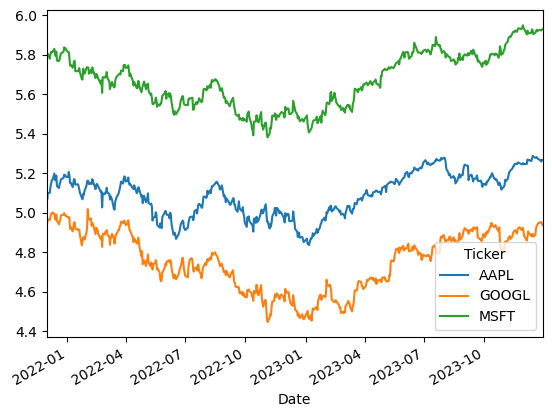

In [85]:
def get_sp500_symbols():
    sp500_symbols = ['AAPL', 'MSFT', 'GOOGL']  # Have feed list of S&P 500 component symbols
    return sp500_symbols

if __name__ == '__main__':
    # get all stock info interested
    data_frame = pdr.get_data_yahoo(get_sp500_symbols(), start='2021-12-01', end='2023-12-31')
    
    print(data_frame.head())

    # Filter by open prices
    log_price = np.log(data_frame['Open'])
    ax = log_price.plot()
    xl = ax.set_xlim(log_price.index.min(), log_price.index.max())

In [86]:
# Dicker-fuller test for APPL, fail to reject the null hypothesis p-value > 0.05
ADF(log_price.AAPL, trend="c")

Test Statistic,-1.672
P-value,0.445
Lags,0


In [87]:
# Dicker-fuller test for GOOGL, fail to reject the null hypothesis p-value > 0.05
ADF(log_price.GOOGL, trend="c")

Test Statistic,-1.711
P-value,0.426
Lags,0


In [88]:
# Dicker-fuller test for MSFT, fail to reject the null hypothesis p-value > 0.05
ADF(log_price.MSFT, trend="c")

Test Statistic,-0.859
P-value,0.801
Lags,4


In [89]:
# Michael: APPL & MSFT looks cointegrated, p-value < 0.05, but fail the ADF test
eg_test = engle_granger(log_price.AAPL, log_price.MSFT, trend="n")
eg_test

Test Statistic,-3.632
P-value,0.004
ADF Lag length,0
Estimated Root ρ (γ+1),0.954


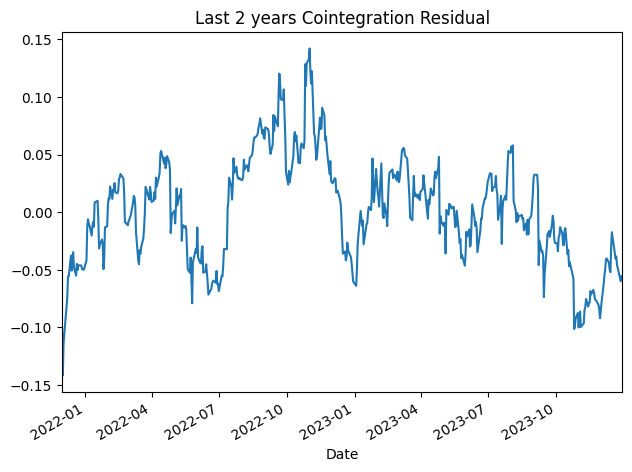

In [90]:
# Michael: Plot the residuals for cointegration 
fig = eg_test.plot()
ax = fig.get_axes()[0]
title = ax.set_title("Last 2 years Cointegration Residual")